**GEOSPATIAL ANALYSIS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Task/Dataset .csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df[['Latitude', 'Longitude', 'Aggregate rating', 'City', 'Country Code']].head()


,Latitude,Longitude,Aggregate rating,City,Country Code
0,14.565443,121.027535,4.8,Makati City,162
1,14.553708,121.014101,4.5,Makati City,162
2,14.581404,121.056831,4.4,Mandaluyong City,162
3,14.585318,121.056475,4.9,Mandaluyong City,162
4,14.584450,121.057508,4.8,Mandaluyong City,162


In [ ]:
geo_df = df.dropna(subset=['Latitude', 'Longitude'])
geo_df.shape


(9551, 21)

In [ ]:
import folium

center = [geo_df['Latitude'].mean(), geo_df['Longitude'].mean()]
m = folium.Map(location=center, zoom_start=2)

for _, row in geo_df.sample(300).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        fill=True
    ).add_to(m)

m


In [ ]:
geo_df['City'].value_counts().head(10)


,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Lucknow,21
Ahmedabad,21
Amritsar,21


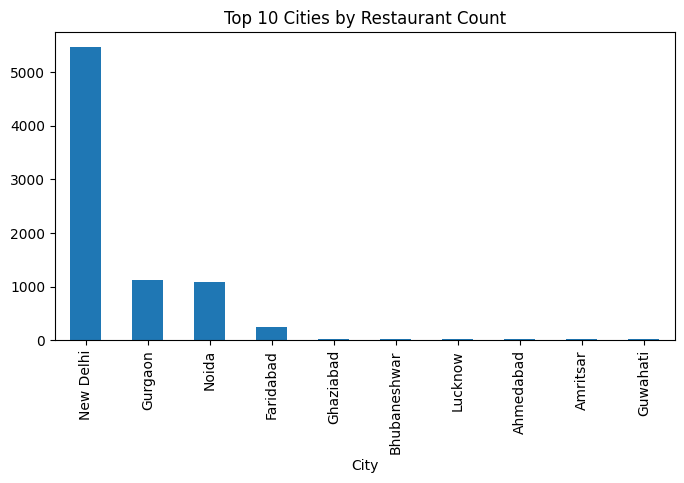

In [ ]:
geo_df['City'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Cities by Restaurant Count")
plt.show()


In [ ]:
geo_df['Country Code'].value_counts().head(10)


,count
Country Code,
1,8652
216,434
215,80
30,60
189,60
214,60
148,40
208,34
14,24


In [ ]:
geo_df[['Latitude', 'Longitude', 'Aggregate rating']].corr()


,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.043207,0.000516
Longitude,0.043207,1.000000,-0.116818
Aggregate rating,0.000516,-0.116818,1.000000


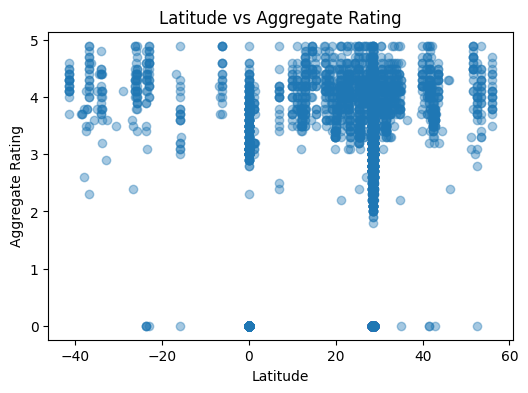

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(geo_df['Latitude'], geo_df['Aggregate rating'], alpha=0.4)
plt.title("Latitude vs Aggregate Rating")
plt.xlabel("Latitude")
plt.ylabel("Aggregate Rating")
plt.show()


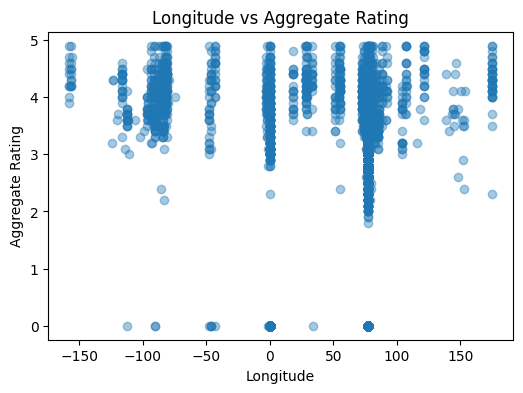

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(geo_df['Longitude'], geo_df['Aggregate rating'], alpha=0.4)
plt.title("Longitude vs Aggregate Rating")
plt.xlabel("Longitude")
plt.ylabel("Aggregate Rating")
plt.show()


Conclusion:
Restaurant locations were visualized using latitude and longitude on a map.
The distribution shows that restaurants are concentrated in certain cities and countries.
Correlation analysis indicates that restaurant ratings do not strongly depend on geographic location.
